# GKR protocol

<a id='contents'></a>
## Contents

* [Setup](#setup)
* [Introduction](#introduction)
* [...](#...)
* [...](#...)
* [...](#...)
* [...](#...)
* [References](#references)

<a id='setup'></a>
## Setup
↑↑ [Contents](#contents) ↓ [Introduction](#introduction)

In [1]:
from pathlib import Path
import os
import sys

# To use this project, set an environment variable named "ZERO_KNOWLEDGE" on your system
# Determine the project root directory and add it to the Python path
notebook_path = Path(os.getcwd()).resolve()  # Path to the current working directory
project_root = notebook_path.parent          # Parent directory of notebooks, which is the project root

# Add the project root directory to the Python path
sys.path.append(str(project_root))

# The setup module is project_root/scripts/setup.py
from scripts.setup import *


PROJECT DIRECTORY TREE AS AT 2024-12-23 13:37:26

BASE PATH: F:\PROJECTS\INFERENCE-LABS\ZK-NOTEBOOKS

├─ assets/
├─ notebooks/
│  └─ 01-sum-check-protocol.ipynb
│  └─ 02-multilinear-extensions.ipynb
│  └─ 03-arithmetic-circuits.ipynb
│  └─ 04-gkr-protocol.ipynb
├─ scripts/
│  └─ arithmetic_circuits.py
│  └─ gkr_protocol.py
│  └─ info.py
│  └─ multilinear_extensions.py
│  └─ setup.py
│  └─ sum_check.py
│  └─ utils.py
└─ .gitignore
└─ LICENSE
└─ README.md
└─ requirements.txt

PATHS TO FIRST-LEVEL SUBDIRECTORIES STORED IN 'PATH' DICTIONARY

├─ path['scripts'] = F:\projects\inference-labs\zk-notebooks\scripts
├─ path['notebooks'] = F:\projects\inference-labs\zk-notebooks\notebooks
├─ path['circuits'] = F:\projects\inference-labs\zk-notebooks\circuits
├─ path['assets'] = F:\projects\inference-labs\zk-notebooks\assets


<a id='introduction'></a>
## Introduction
↑↑ [Contents](#contents) ↑ [Setup](#setup) ↓ [...](#...)

Building on our exploration of the [sum-check protocol](./01-sum-check-protocol), [multilinear extensions](./02-multilinear-extensions), and [arithmetic circuits](./03-arithmetic-circuits), we are now ready to present the GKR protocol in its entirety. Originally introduced by Goldwasser, Kalai, and Rothblum [[GKR2008]](#gkr2008), and subsequently refined by many, this protocol stands as a cornerstone of modern interactive proofs for verifying circuit computations. This notebook brings together the ideas developed so far and demonstrates how they culminate in the elegant machinery of the GKR protocol.

Cormode, Mitzenmacher, and Thaler [[CMT2012]](#cmt2012), and Thaler [[THA2015]](#tha2015)

Thaler [[THA2022](#tha2022), &#167;4.6]


<a id='...'></a>
## ...
↑↑ [Contents](#contents) ↑ [Introduction](#introduction) ↓ [...](#...)

In [7]:
from arithmetic_circuits import ArithmeticCircuit

ac = ArithmeticCircuit('(2 + 3)*(4 + 0)', '(2 + 4)*(3 + 0)', prime=7)

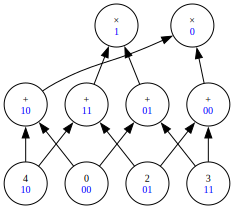

In [9]:
ac.graphviz_circuit_bitstring

In [12]:
ac.W_dict

{2: {(0, 0): 0, (0, 1): 2, (1, 0): 4, (1, 1): 3},
 1: {(1, 0): 4, (1, 1): 6, (0, 0): 5, (0, 1): 3},
 0: {(0,): 6, (1,): 4}}

In [17]:
ac.tilde_add[1]

Poly(6*x_0*x_1*x_2*x_3*x_4 + 6*x_0*x_1*x_2*x_4*x_5 + x_0*x_1*x_2*x_4 + x_0*x_1*x_2*x_5 + 6*x_0*x_1*x_2 + x_0*x_1*x_3*x_4 + x_0*x_2*x_3*x_4 + x_0*x_2*x_3*x_5 + 6*x_0*x_2*x_3 + x_0*x_2*x_4*x_5 + 6*x_0*x_2*x_4 + 6*x_0*x_2*x_5 + x_0*x_2 + 6*x_0*x_3*x_4*x_5 + 2*x_1*x_2*x_3*x_4*x_5 + 6*x_1*x_2*x_3*x_4 + 6*x_1*x_2*x_3*x_5 + x_1*x_2*x_3 + 6*x_1*x_3*x_4*x_5 + 6*x_2*x_3*x_4*x_5 + x_3*x_4*x_5, x_0, x_1, x_2, x_3, x_4, x_5, modulus=7)

In [2]:
from gkr_protocol import line_vectorized, compose_polynomial

In [3]:
from sympy import symbols, Poly
from sympy.polys.domains import GF

w, x, y, z = symbols('w x y z')
W = Poly(x**2 + x*y + y**2 + w*x + w*y + w**3*z + y**2*z + z + 1, w, x, y, z, domain = GF(7))
display(W)
b = (0,1,2,3)
c = (1,2,4,5)
line = line_vectorized(b,c, W.domain.mod)
print(f"Line through b = {b} and c = {c}: {line}")
print(f"Check: line(0) = {[l.eval(0) for l in line]}; line(1) = {[l.eval(1) for l in line]}")
W_circ_line = compose_polynomial(W,line)
print(f"Composition of W with line: {W_circ_line.as_expr()}")

Poly(w**3*z + w*x + w*y + x**2 + x*y + y**2*z + y**2 + z + 1, w, x, y, z, modulus=7)

Line through b = (0, 1, 2, 3) and c = (1, 2, 4, 5): [Poly(t, t, modulus=7) Poly(t + 1, t, modulus=7)
 Poly(2*t + 2, t, modulus=7) Poly(2*t + 3, t, modulus=7)]
Check: line(0) = [0, 1, 2, 3]; line(1) = [1, 2, 4, 5]
Composition of W with line: 2*t**4 - 3*t**3 + 3*t**2 + 2*t + 2


<a id='...'></a>
## ...
↑↑ [Contents](#contents) ↑ [...](#...) ↓ [...](#...)

<a id='...'></a>
## ...
↑↑ [Contents](#contents) ↑ [...](#...) ↓ [...](#...)

<a id='...'></a>
## ...
↑↑ [Contents](#contents) ↑ [...](#...) ↓ [References](#references)

<a id='references'></a>
## References
↑↑ [Contents](#contents) ↑ [...](#...)

<a id='cmt2012'></a>
[CMT2012] Cormode, G., M. Mitzenmacher, and J. Thaler. '[Practical verified computation with streaming interactive proofs](https://doi.org/10.1145/2090236.2090245).' In _Proceedings of the 3rd Innovations in Theoretical Computer Science Conference_, 90&ndash;112, 2012.

<a id='gkr2008'></a>
[GKR2008] Goldwasser, S., Y. T. Kalai, and G. N. Rothblum. '[Delegating computation: interactive proofs for muggles](https://doi.org/10.1145/2699436).' _Journal of the ACM_, 62(4):1&ndash;64, 2008.

<a id='tha2015'></a>
[THA2015] Thaler, J. '[A note on the GKR protocol](https://api.semanticscholar.org/CorpusID:16402332).' 2015.

<a id='tha2022'></a>
[THA2022] Thaler, J. [_Proofs, Arguments, and Zero-Knowledge_](https://people.cs.georgetown.edu/jthaler/ProofsArgsAndZK.pdf). Foundations and Trends in Privacy and Security, Now Publishers, 2022.

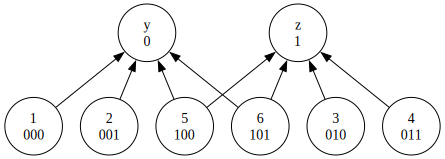

In [9]:
from graphviz import Digraph

# Create a new directed graph
dot = Digraph(format='png')
dot.attr(rankdir='BT')  # Set layout to left-to-right for better visualization

# Add input nodes with their bitstring labels
input_nodes = [
    ('1', '000'), ('2', '001'), ('3', '010'), ('4', '011'), ('5', '100'), ('6', '101')
]
for node, label in input_nodes:
    dot.node(node, label=f'{node}\n{label}', shape='circle')

# Add generalized multiplication gates with their bitstring labels
generalized_gates = [
    ('y', '0'), ('z', '1')
]
for node, label in generalized_gates:
    dot.node(node, label=f'{node}\n{label}', shape='circle')

# Define edges based on the description
edges = [
    ('1', 'y'), ('5', 'y'), ('2', 'y'), ('6', 'y'),
    ('3', 'z'), ('5', 'z'), ('4', 'z'), ('6', 'z')
]
for src, dest in edges:
    dot.edge(src, dest)

# Render the graph
file_path = path["assets"] / "generalized_gates"
dot.render(file_path, view=True)
dot